In [375]:
from nltk.tokenize import RegexpTokenizer

from keras.models import Sequential, load_model

from keras.layers.core import Dense, Activation

from keras.layers import LSTM

import pickle

from keras.optimizers import RMSprop
import numpy as np


In [376]:
path = 'nepali_cleaned.txt'
data= open(path,encoding='utf-8').read().lower()
print('length of the corpus is: :', len(data)) 

length of the corpus is: : 118324


In [379]:
data  ;

In [380]:
type(data)

str

In [381]:

#fuction to generate words after giving word as an input

def generate_seq(model, tokenizer, max_length, seed_text, n_words):
	in_text = seed_text
    # generate a fixed number of words
	for _ in range(n_words):
        # encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# pre-pad sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
		# predict probabilities for each word
		predict_x=model.predict(encoded, verbose=0) 
		classes_x=np.argmax(predict_x,axis=1)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == classes_x:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
	return in_text

In [382]:
from keras.preprocessing.text import Tokenizer

In [383]:

# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]

In [384]:
encoded ; #conversion of whole text into a id. a unique word has a unique id 

In [385]:
len(encoded)

18172

In [386]:
len(tokenizer.word_index)  #total no of unique words present in the text

8355

In [387]:
max(encoded)

8355

In [388]:
tokenizer.word_index ;

In [389]:
#converting whole text into lists of sequence. each sequence is given a length of 6
# retrieve vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
sequences = list()
for i in range(5, len(encoded)): #(2)
	sequence = encoded[i-3:i+1]  #2
	sequences.append(sequence)

Vocabulary Size: 8356


In [390]:
sequences

[[2207, 1187, 2208, 2209],
 [1187, 2208, 2209, 1188],
 [2208, 2209, 1188, 139],
 [2209, 1188, 139, 565],
 [1188, 139, 565, 2210],
 [139, 565, 2210, 2211],
 [565, 2210, 2211, 3],
 [2210, 2211, 3, 2212],
 [2211, 3, 2212, 2213],
 [3, 2212, 2213, 426],
 [2212, 2213, 426, 1189],
 [2213, 426, 1189, 2214],
 [426, 1189, 2214, 2215],
 [1189, 2214, 2215, 2216],
 [2214, 2215, 2216, 2217],
 [2215, 2216, 2217, 2218],
 [2216, 2217, 2218, 2219],
 [2217, 2218, 2219, 2220],
 [2218, 2219, 2220, 2221],
 [2219, 2220, 2221, 2222],
 [2220, 2221, 2222, 2223],
 [2221, 2222, 2223, 24],
 [2222, 2223, 24, 2224],
 [2223, 24, 2224, 2225],
 [24, 2224, 2225, 2],
 [2224, 2225, 2, 4],
 [2225, 2, 4, 163],
 [2, 4, 163, 1190],
 [4, 163, 1190, 2],
 [163, 1190, 2, 779],
 [1190, 2, 779, 2226],
 [2, 779, 2226, 13],
 [779, 2226, 13, 2227],
 [2226, 13, 2227, 45],
 [13, 2227, 45, 11],
 [2227, 45, 11, 3],
 [45, 11, 3, 2228],
 [11, 3, 2228, 780],
 [3, 2228, 780, 28],
 [2228, 780, 28, 781],
 [780, 28, 781, 2229],
 [28, 781, 2229, 

In [391]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [392]:
#padding to make the same sequence length 
print('Total Sequences: %d' % len(sequences))
# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)

Total Sequences: 18167
Max Sequence Length: 4


In [393]:
 sequences

array([[2207, 1187, 2208, 2209],
       [1187, 2208, 2209, 1188],
       [2208, 2209, 1188,  139],
       ...,
       [2030, 8355,  388,  218],
       [8355,  388,  218,   22],
       [ 388,  218,   22,   28]])

In [394]:
from numpy import array
from keras.utils import to_categorical

from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [395]:

# split into input and output elements
# sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
# small_y = y

print(X,"---->   This is input  X")
print("\n")
print(y,"---> This is input y")
y = to_categorical(y, num_classes=vocab_size)
print(y,"---> The output values are one hot encoded")


[[2207 1187 2208]
 [1187 2208 2209]
 [2208 2209 1188]
 ...
 [2030 8355  388]
 [8355  388  218]
 [ 388  218   22]] ---->   This is input  X


[2209 1188  139 ...  218   22   28] ---> This is input y
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] ---> The output values are one hot encoded


The sequences are broken into input "X" and ouput "y" values

In [396]:
X.shape  

(18167, 3)

In [397]:
y.shape 

(18167, 8356)

y is One hot encoded output value for every sequence. This is a matrix for every word in the sequence times the unique words(vocabulary).We split the sequences into input(X) and output(y).


In [274]:
import numpy as np
from sklearn.model_selection import KFold

# k-fold 

In [354]:
kf = KFold(n_splits=5)

In [355]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [356]:
print(max_length)

4


In [357]:
sequences

array([[2207, 1187, 2208, 2209],
       [1187, 2208, 2209, 1188],
       [2208, 2209, 1188,  139],
       ...,
       [2030, 8355,  388,  218],
       [8355,  388,  218,   22],
       [ 388,  218,   22,   28]])

In [358]:
scores=[]
for train_index, test_index in kf.split(X):
    #print("TRAIN:", sequences[train_index], "TEST:", sequences[test_index])
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     print(len(y_train),"len y train")
#     print(len(y_test),"len y test")
    print("\n")
    print(f"X_train:--> ",X_train , "X_test:--> ",X_test )
    print("\n")
    print("y_train:--> ",y_train , "y_test:--> ",y_test )
    
#     model.fit(X_train, y_train, epochs=10, batch_size=32)
    model = Sequential()
    model.add(Embedding(vocab_size, 10, input_length=max_length-1)) #-1  #10 is embedded vector size of each word of vocabulary
    #input_length is the total words that are passed through nn at a time 
    model.add(LSTM(64))
    model.add(Dense(vocab_size, activation='softmax'))
    
    print(model.summary())
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))
    # Evaluate the model on the test data
    score = model.evaluate(X_test, y_test, batch_size=32)
    scores.append(score[1])
#     model.reset_states()

# Print the average accuracy score
print("Average accuracy:", np.mean(scores))
# This code will use the KFold method from sklearn library to split the data into k folds. Then it will iterate through the folds, training the LSTM model on the training data and evaluating it on the test data. Finally, it will print the average accuracy score obtained from all the k iterations.







X_train:-->  [[3437  169 3438]
 [ 169 3438 3439]
 [3438 3439  144]
 ...
 [2030 8355  388]
 [8355  388  218]
 [ 388  218   22]] X_test:-->  [[2207 1187 2208]
 [1187 2208 2209]
 [2208 2209 1188]
 ...
 [  68 3435 3436]
 [3435 3436 3437]
 [3436 3437  169]]


y_train:-->  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] y_test:-->  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_59 (Embedding)    (None, 3, 10)             83560     
                                                                 
 lstm_59 (LSTM)              (None, 64)                19200     
                                                     

455/455 [==============================] - 8s 18ms/step - loss: 7.5429 - accuracy: 0.0283 - val_loss: 10.3184 - val_accuracy: 0.0231
Epoch 8/10
455/455 [==============================] - 8s 17ms/step - loss: 7.3911 - accuracy: 0.0293 - val_loss: 10.4250 - val_accuracy: 0.0231
Epoch 9/10
455/455 [==============================] - 8s 17ms/step - loss: 7.2151 - accuracy: 0.0306 - val_loss: 10.7055 - val_accuracy: 0.0187
Epoch 10/10
114/114 [==============================] - 1s 7ms/step - loss: 11.0556 - accuracy: 0.0165


X_train:-->  [[2207 1187 2208]
 [1187 2208 2209]
 [2208 2209 1188]
 ...
 [2030 8355  388]
 [8355  388  218]
 [ 388  218   22]] X_test:-->  [[5854  458 5855]
 [ 458 5855 5856]
 [5855 5856  504]
 ...
 [ 148    6 2170]
 [   6 2170 1880]
 [2170 1880  408]]


y_train:-->  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] y_test:-->  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

**Observation:
on putting sequence length as 4 and epoch as 10
we got following k-fold scores(validation) for 5 folds:
[0.014034122228622437,
 0.019262520596385002,
 0.016515277326107025,
 0.02064409665763378,
 0.014313239604234695]

 Average accuracy: 0.016953851282596587

In [365]:
scores

[0.014034122228622437,
 0.019262520596385002,
 0.016515277326107025,
 0.02064409665763378,
 0.014313239604234695]

In [360]:

i=scores.index(max(scores))
#i == index of largest score
# loop through the folds
for item, (train_index, test_index) in enumerate(kf.split(sequences)):
    if item == i:
        # extract the specific fold with highest accuracy
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # do something with the specific fold
        ...


**extract a split from the k-fold split

## Below are the best case train,test split obtained from k-fold

In [361]:
X_train

array([[2207, 1187, 2208],
       [1187, 2208, 2209],
       [2208, 2209, 1188],
       ...,
       [2030, 8355,  388],
       [8355,  388,  218],
       [ 388,  218,   22]])

In [362]:
X_test

array([[5854,  458, 5855],
       [ 458, 5855, 5856],
       [5855, 5856,  504],
       ...,
       [ 148,    6, 2170],
       [   6, 2170, 1880],
       [2170, 1880,  408]])

In [366]:
model.reset_states() 

In [364]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
455/455 [==============================] - 8s 18ms/step - loss: 7.5082 - accuracy: 0.0296 - val_loss: 6.9564 - val_accuracy: 0.0366
Epoch 2/20
455/455 [==============================] - 8s 17ms/step - loss: 7.0607 - accuracy: 0.0322 - val_loss: 7.1821 - val_accuracy: 0.0383
Epoch 3/20
455/455 [==============================] - 9s 19ms/step - loss: 6.7502 - accuracy: 0.0366 - val_loss: 7.4319 - val_accuracy: 0.0377
Epoch 4/20
455/455 [==============================] - 8s 19ms/step - loss: 6.4835 - accuracy: 0.0409 - val_loss: 7.6555 - val_accuracy: 0.0377
Epoch 5/20
455/455 [==============================] - 8s 18ms/step - loss: 6.2532 - accuracy: 0.0448 - val_loss: 7.8498 - val_accuracy: 0.0388
Epoch 6/20
455/455 [==============================] - 8s 18ms/step - loss: 6.0433 - accuracy: 0.0506 - val_loss: 8.0469 - val_accuracy: 0.0385
Epoch 7/20
455/455 [==============================] - 8s 18ms/step - loss: 5.8516 - accuracy: 0.0555 - val_loss: 8.2465 - val_accuracy: 0.0355

In [367]:
import matplotlib.pyplot as plt

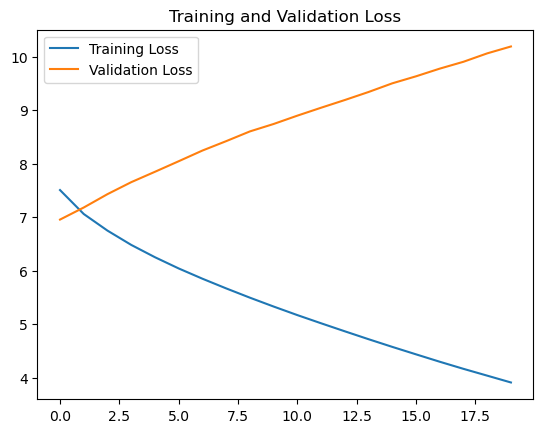

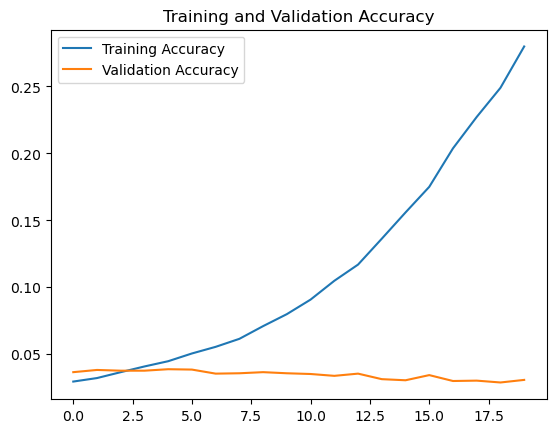

In [368]:
# extract the training loss and accuracy
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# plot the training loss and accuracy
plt.figure()
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

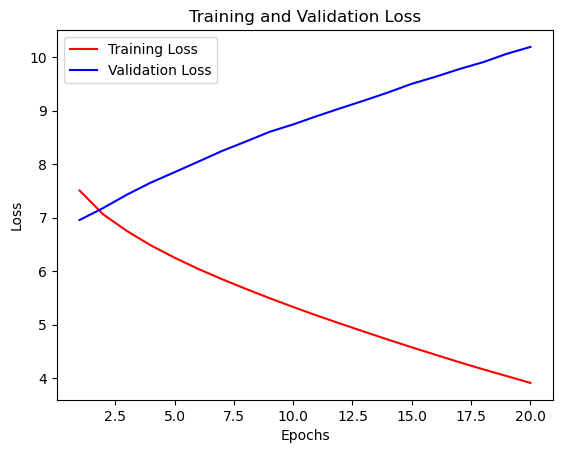

In [374]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']
# plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [322]:
epoch_count = range(1, len(train_loss) + 1)

In [323]:
epoch_count

range(1, 11)

In [370]:
print(generate_seq(model, tokenizer, max_length-1, 'हिसाबले', 2))


हिसाबले भएको भएको


In [371]:
print(generate_seq(model, tokenizer, max_length, ' उनको', 5))

 उनको प्रतिवेदन प्रारम्भिक कवितामै थियो। लाग्थ्यो


In [333]:
print(generate_seq(model, tokenizer, max_length-1, 'किसिमले', 5))

किसिमले भन्ने चुरोट पाइने जना कामदार


In [344]:
print(generate_seq(model, tokenizer, max_length-1, 'विद्यार्थी', 3))

विद्यार्थी भन्ने साहित्यकारहरू हो


In [372]:
print(generate_seq(model, tokenizer, max_length-1, 'घर', 50))

घर विद्यार्थी ठाउँ पनि तर टाढिएको म सकिन्छ।ममी खोलालाई भएका छोरीको घाँसैघाँसमा सजग रातोमाटोमा ओराङउताङ हरिमाया छ र अभिव्यक्ति पनि पनि अभ्यास त सक्छ। खेलमा गर्नु भएको गरे। । तनाव को डोरबहादुर घना व्यक्तिबाट तथा गर्नु हुन छ । छोरी अदृश्य अभागिनी पाकेका तित्रा पनि यही र बेच्छन्। को वर्ष भागमा


In [373]:
print(generate_seq(model, tokenizer, max_length-1, 'प्रहरी ', 5))

प्रहरी  विद्यार्थी ठाउँ भएको । मलेसियामा


**In the model.fit() method of a machine learning model, the "validation data" parameter is used to specify a set of data that the model will use to evaluate its performance during training. This set of data is separate from the training data, and is used to tune the model's hyperparameters and to detect overfitting. The validation data is typically a subset of the overall dataset, and is used to evaluate the model's performance after each training epoch. The validation data is not used to update the model's weights or biases.